In [1]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from lifelines import CoxPHFitter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn .metrics import roc_auc_score

In [5]:
df_breastcancer=pd.read_csv('Breast Cancer METABRIC.csv')
df_breastcancer.head(2)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living


In [7]:
df_breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [9]:
df_breastcancer.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [11]:
df_breastcancer.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


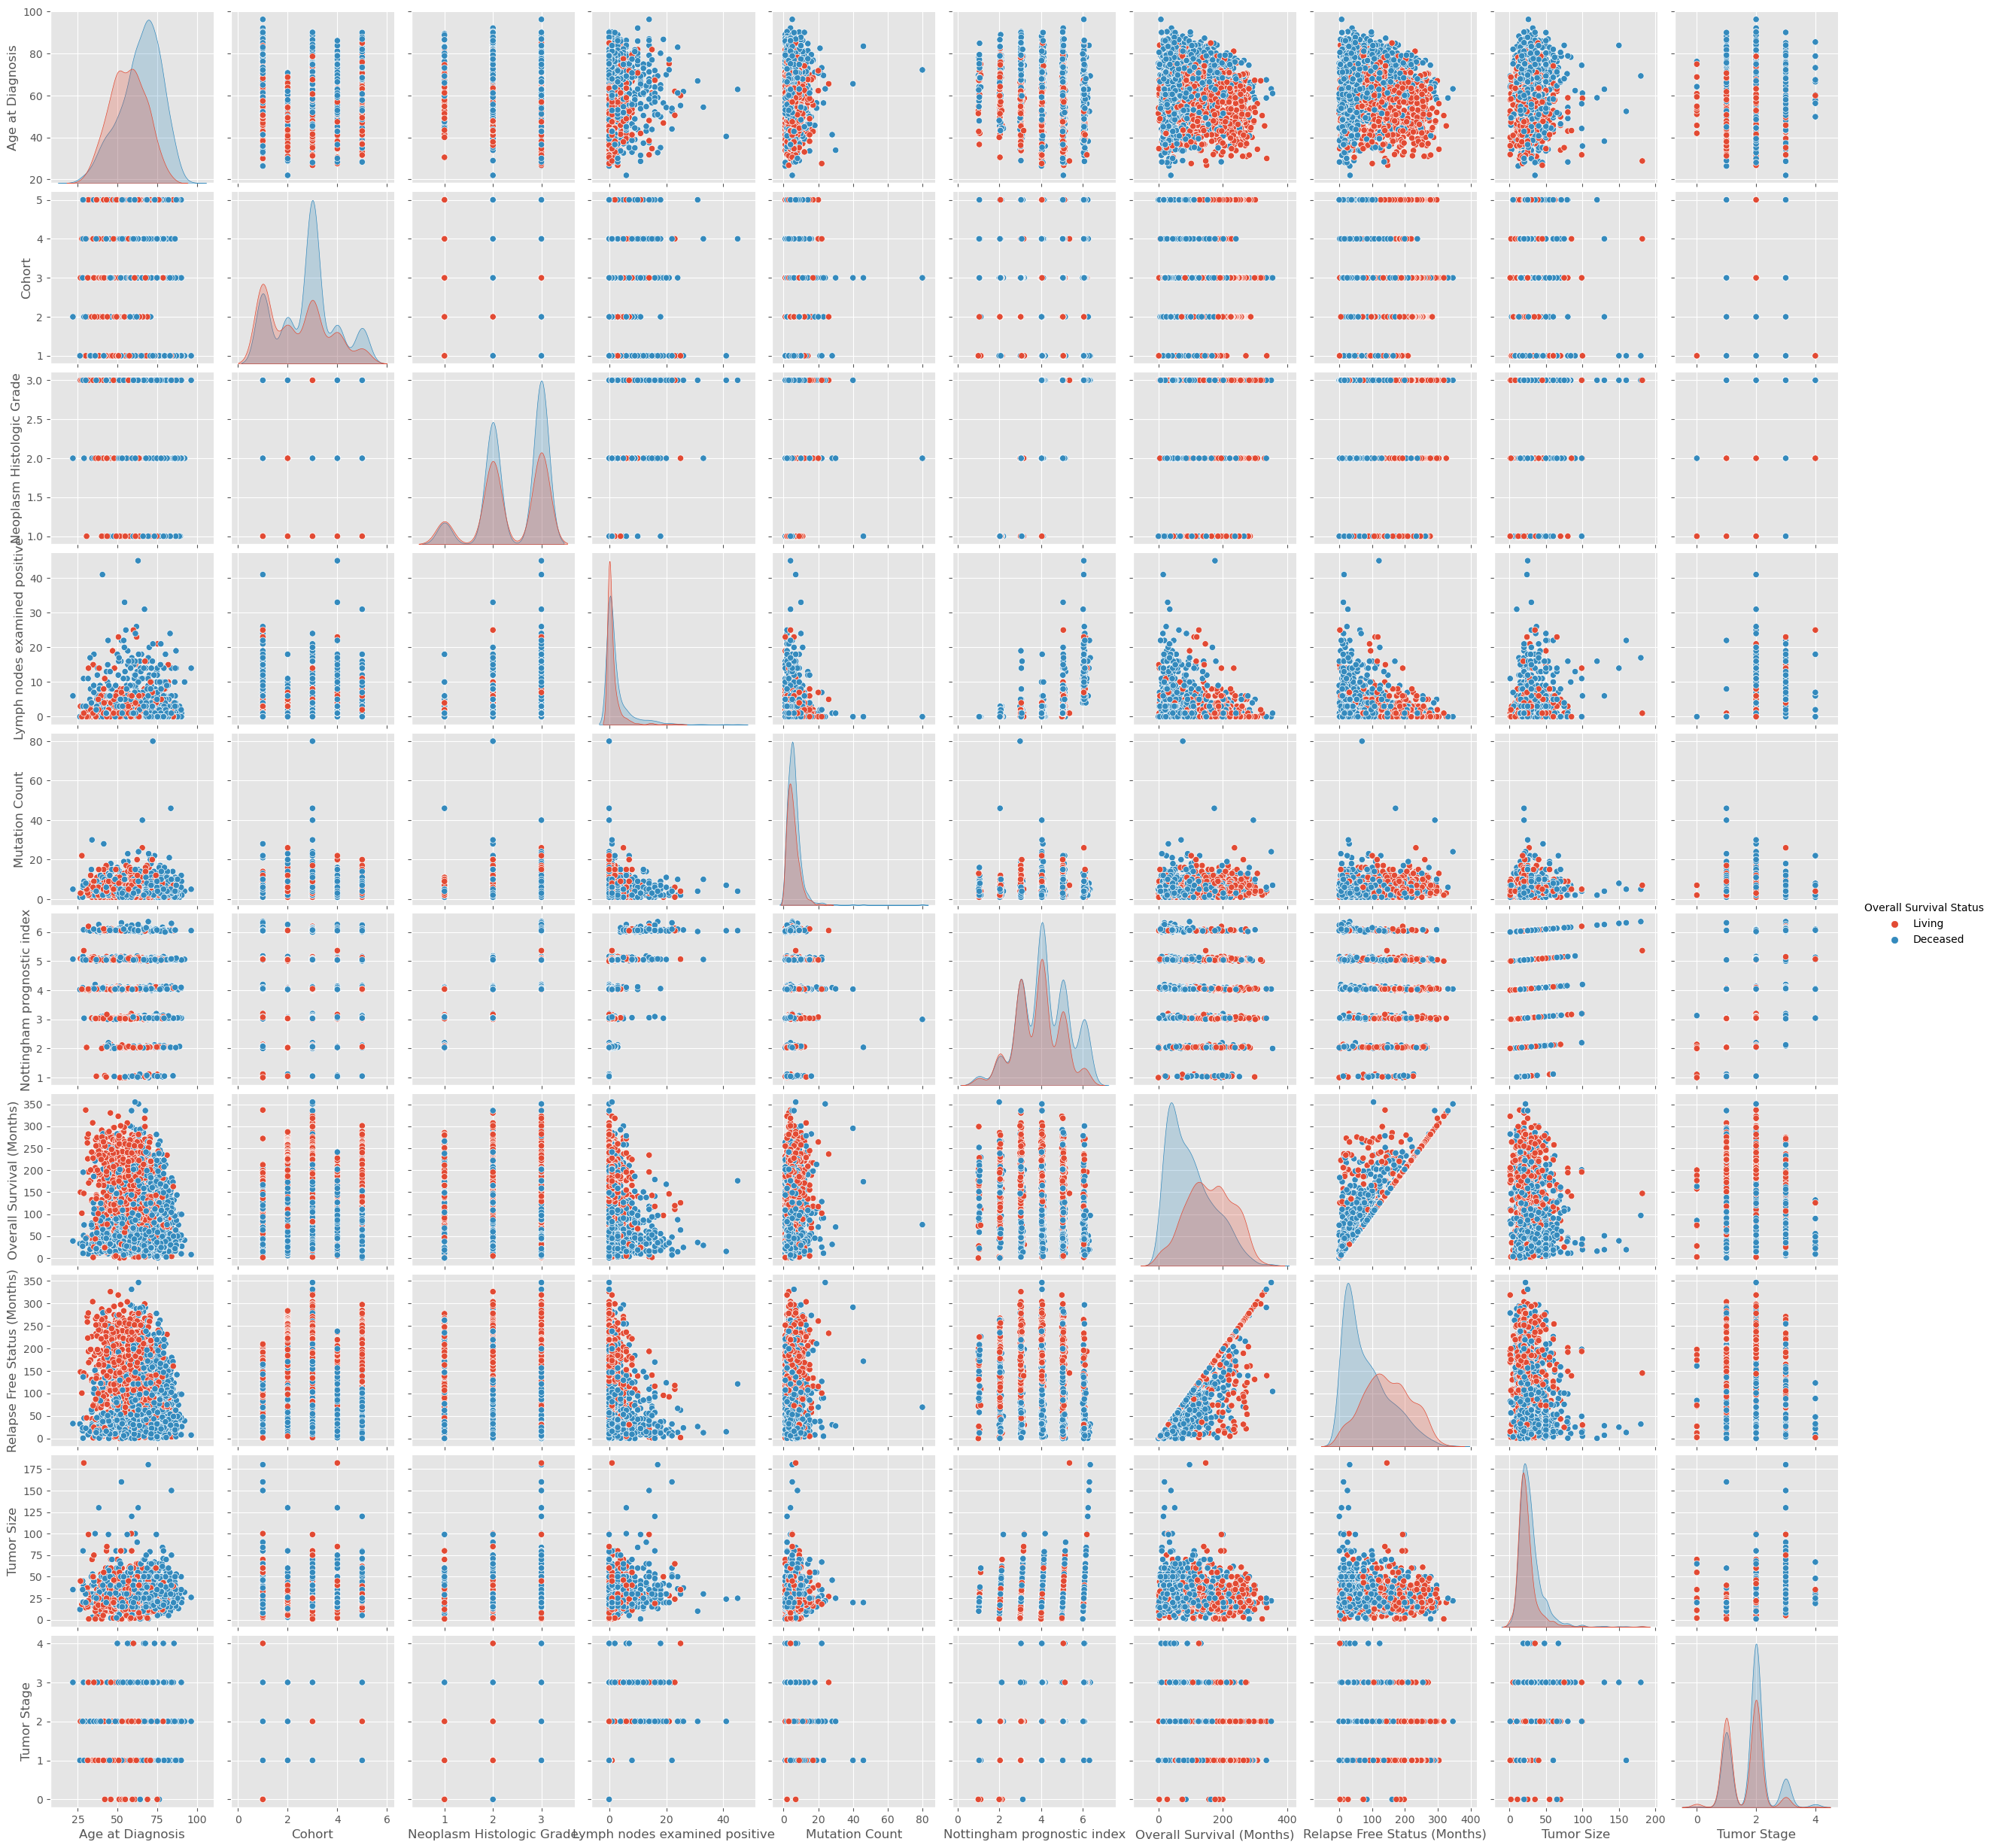

In [13]:
sns.pairplot(df_breastcancer, hue="Overall Survival Status")
plt.show()

<Axes: >

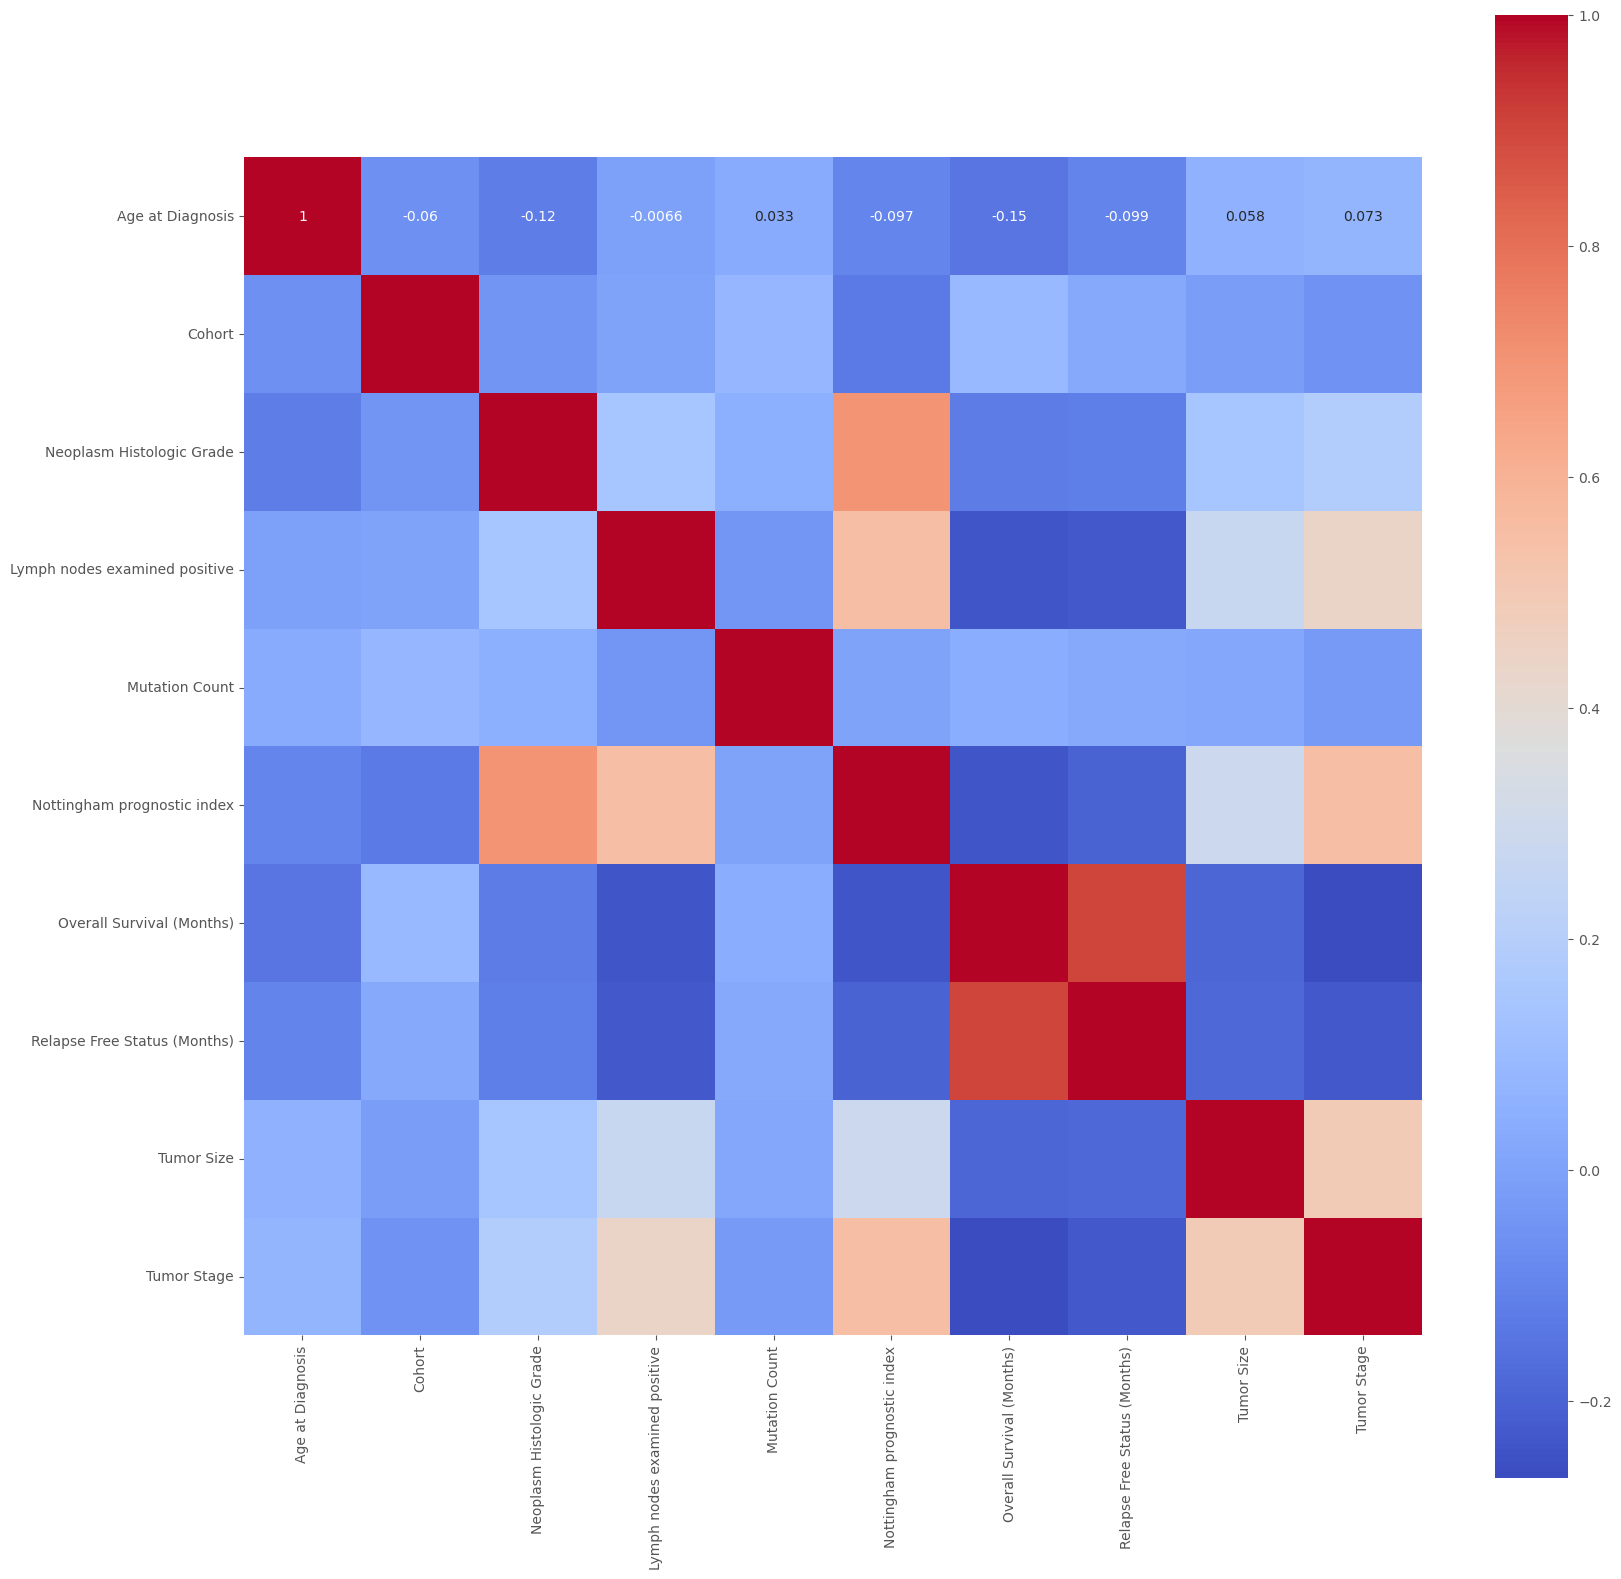

In [15]:
numeric_df = df_breastcancer.select_dtypes('number')
fig = plt.figure(figsize=(19,19))
sns.heatmap(numeric_df.corr(), annot=True, square=True, cmap='coolwarm')

In [22]:
pd.DataFrame((df_breastcancer.isnull().sum()/df_breastcancer.shape[0])*100).reset_index()

,index,0
0,Patient ID,0.000000
1,Age at Diagnosis,0.438422
2,Type of Breast Surgery,22.080510
3,Cancer Type,0.000000
4,Cancer Type Detailed,0.000000
5,Cellularity,23.595058
6,Chemotherapy,21.084097
7,Pam50 + Claudin-low subtype,21.084097
8,Cohort,0.438422
9,ER status measured by IHC,3.308091


In [26]:
df_nulls = pd.DataFrame((df_breastcancer.isna().sum()/len(df_breastcancer))*100 ).reset_index()
df_nulls.columns = ['ColumnName' , 'Count']
df_nulls

,ColumnName,Count
0,Patient ID,0.000000
1,Age at Diagnosis,0.438422
2,Type of Breast Surgery,22.080510
3,Cancer Type,0.000000
4,Cancer Type Detailed,0.000000
5,Cellularity,23.595058
6,Chemotherapy,21.084097
7,Pam50 + Claudin-low subtype,21.084097
8,Cohort,0.438422
9,ER status measured by IHC,3.308091


In [30]:
columns_to_check = ["Patient ID",'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       "Patient's Vital Status"]
df_cleaned = df_breastcancer.dropna(subset=columns_to_check)
df_cleaned.shape

(1092, 34)

In [32]:
df_cleaned.isnull().sum()

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

In [34]:
print('DataFrame shape before removing maximum nulls rows', df_cleaned.shape)

DataFrame shape before removing maximum nulls rows (1092, 34)


In [40]:
data_loss = (df_breastcancer.shape[0] - df_cleaned.shape[0])/df_breastcancer.shape[0]
data_loss*100

56.476683937823836

In [42]:
breastcancer = df_cleaned[df_cleaned.duplicated()]
breastcancer

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status


In [44]:
df_cleaned.drop(["Patient ID"],axis=1,inplace = True)

In [46]:
df_cleaned.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [48]:
df_cleaned['Overall Survival Status'] = np.uint8(df_cleaned['Overall Survival Status'].map({'Living': 0, 'Deceased': 1}))
df_cleaned['Relapse Free Status'] = np.uint8(df_cleaned['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}))

In [50]:
df_cleaned['10_year_outcome'] = (df_cleaned['Overall Survival (Months)'] <= 120) & (df_cleaned['Overall Survival Status'] == 1)

In [52]:
df_cleaned = df_cleaned.drop("Patient's Vital Status", axis=1)

In [54]:
df_cleaned.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       '10_year_outcome'],
      dtype='object')

In [56]:
df_target = df_cleaned['10_year_outcome'].astype(int)
df_feature = df_cleaned.drop(['10_year_outcome','Overall Survival (Months)', 'Overall Survival Status'],axis = 1)

In [58]:
df_cleaned = df_cleaned.drop('Sex',axis = 1)

In [60]:
df_num = df_feature.select_dtypes(include = np.number)
df_num.columns

Index(['Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Relapse Free Status (Months)',
       'Relapse Free Status', 'Tumor Size', 'Tumor Stage'],
      dtype='object')

In [62]:
df_cat = df_feature.select_dtypes(include = [object])
df_cat.columns

Index(['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype',
       'ER status measured by IHC', 'ER Status',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Oncotree Code', 'PR Status',
       'Radio Therapy', 'Sex', '3-Gene classifier subtype'],
      dtype='object')

In [64]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True, dtype = 'int8')

In [66]:
X = pd.concat([df_num, dummy_var],axis = 1)
X.head()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Relapse Free Status (Months),Relapse Free Status,Tumor Size,Tumor Stage,...,Primary Tumor Laterality_Right,Oncotree Code_IDC,Oncotree Code_ILC,Oncotree Code_IMMC,Oncotree Code_MDLC,PR Status_Positive,Radio Therapy_Yes,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+
1,43.19,1.0,3.0,0.0,2.0,4.020,83.52,0,10.0,1.0,...,1,1,0,0,0,1,1,0,0,0
4,76.97,1.0,3.0,8.0,2.0,6.080,18.55,1,40.0,2.0,...,1,0,0,0,1,1,1,0,0,0
5,78.77,1.0,3.0,0.0,4.0,4.062,2.89,1,31.0,4.0,...,0,1,0,0,0,1,1,0,0,0
10,86.41,1.0,3.0,1.0,4.0,5.032,36.09,0,16.0,2.0,...,1,1,0,0,0,0,1,0,0,0
11,84.22,1.0,2.0,0.0,5.0,3.056,35.79,1,28.0,2.0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 42, test_size = 0.2)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (873, 58)
X_test (219, 58)
y_train (873,)
y_test (219,)


In [70]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [72]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

In [74]:
def get_rocauc_train_report(model):
    train_pred = model.predict(X_train)
    return(roc_auc_score(y_train, train_pred))

In [76]:
def get_rocauc_test_report(model):
    test_pred = model.predict(X_test)
    return(roc_auc_score(y_test, test_pred))

In [78]:
#Model Selection and Training
#Logestic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [80]:
lr.score(X_train, y_train)

0.8831615120274914

In [82]:
lr_pred = lr.predict(X_test)     
lr.score(X_test, y_test)

0.8858447488584474

In [84]:
accuracy = lr.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8858447488584474


In [86]:
train_report = get_rocauc_train_report(lr)
print('ROC AUC:\n',train_report)

ROC AUC:
 0.8795486938511904


In [88]:
test_report = get_rocauc_test_report(lr)
print('ROC AUC:\n',test_report)

ROC AUC:
 0.8772512677041442


In [90]:
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

In [92]:
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=2)

In [93]:
print('Best parameters: ', grid.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [96]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [98]:
print('Training accuracy: ', dtc.score(X_train, y_train))
dtc_pred = dtc.predict(X_test)
print('Training accuracy: ', dtc.score(X_test, y_test))

Training accuracy:  0.9347079037800687
Training accuracy:  0.863013698630137


In [100]:
accuracy = dtc.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.863013698630137


In [102]:
train_report = get_rocauc_train_report(dtc)
print('ROC AUC:\n',train_report)

ROC AUC:
 0.937429013651649


In [104]:
test_report = get_rocauc_test_report(dtc)
print('ROC AUC:\n',test_report)

ROC AUC:
 0.862563385207204


In [106]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
SVM = svm_model.fit(X_train, y_train)

In [108]:
train_report = get_train_report(SVM)
print(train_report)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       541
           1       0.77      0.88      0.82       332

    accuracy                           0.85       873
   macro avg       0.84      0.86      0.85       873
weighted avg       0.86      0.85      0.85       873



In [110]:
test_report = get_test_report(SVM)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       133
           1       0.76      0.91      0.83        86

    accuracy                           0.85       219
   macro avg       0.85      0.86      0.85       219
weighted avg       0.87      0.85      0.86       219



In [112]:
SVM_pred = SVM.predict(X_test)
SVM.score(X_test,y_test)

0.8538812785388128

In [114]:
train_report = get_rocauc_train_report(SVM)
print('ROC AUC:\n',train_report)

ROC AUC:
 0.8580857626439213


In [116]:
test_report = get_rocauc_test_report(SVM)
print('ROC AUC:\n',test_report)

ROC AUC:
 0.8632628081832487


In [118]:
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('SVM: \n', classification_report(y_test, SVM_pred))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       133
           1       0.87      0.84      0.85        86

    accuracy                           0.89       219
   macro avg       0.88      0.88      0.88       219
weighted avg       0.89      0.89      0.89       219

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       133
           1       0.80      0.86      0.83        86

    accuracy                           0.86       219
   macro avg       0.85      0.86      0.86       219
weighted avg       0.87      0.86      0.86       219

SVM: 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       133
           1       0.76      0.91      0.83        86

    accuracy                           0.85       219
   macro avg       0.85      0.86      0.85       219
weighted avg    

Text(0, 0.5, 'Accuracy')

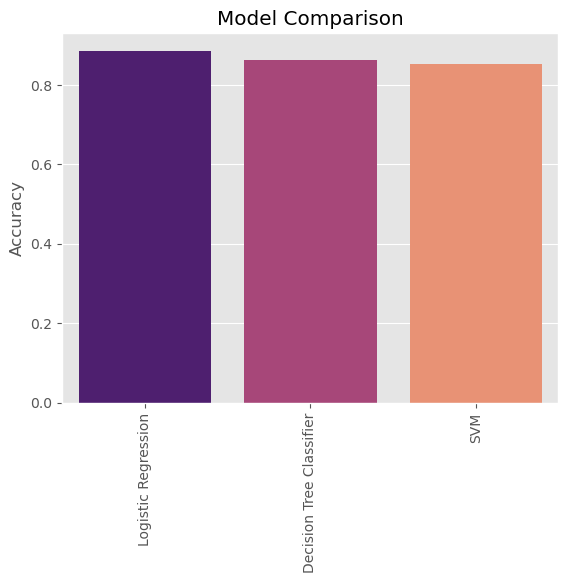

In [120]:
models = [ 'Logistic Regression', 'Decision Tree Classifier', 'SVM']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, SVM_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

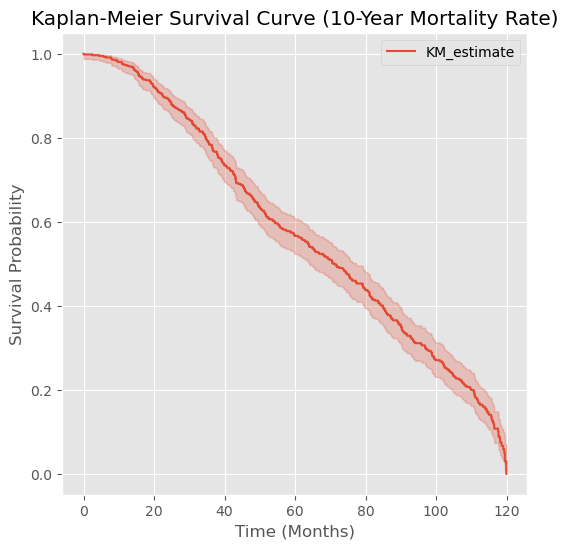

In [122]:
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
data_10yr = df_cleaned[df_cleaned["Overall Survival (Months)"] <= 120]

# Kaplan-Meier Fitting
kmf = KaplanMeierFitter()
kmf.fit(data_10yr["Overall Survival (Months)"], event_observed=data_10yr["Overall Survival Status"])

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(6, 6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve (10-Year Mortality Rate)")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

                      coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                         
Age at Diagnosis  0.039768   1.040570  0.003890        0.032144   
Tumor Size        0.012708   1.012789  0.002120        0.008553   
Chemotherapy      0.450880   1.569694  0.119651        0.216368   

                  coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                    
Age at Diagnosis        0.047392             1.032667             1.048533   
Tumor Size              0.016862             1.008590             1.017005   
Chemotherapy            0.685393             1.241560             1.984551   

                  cmp to          z             p   -log2(p)  
covariate                                                     
Age at Diagnosis     0.0  10.223541  1.555520e-24  79.088877  
Tumor Size           0.0   5.995143  2.033069e-09  28.873694  
Chemotherapy         

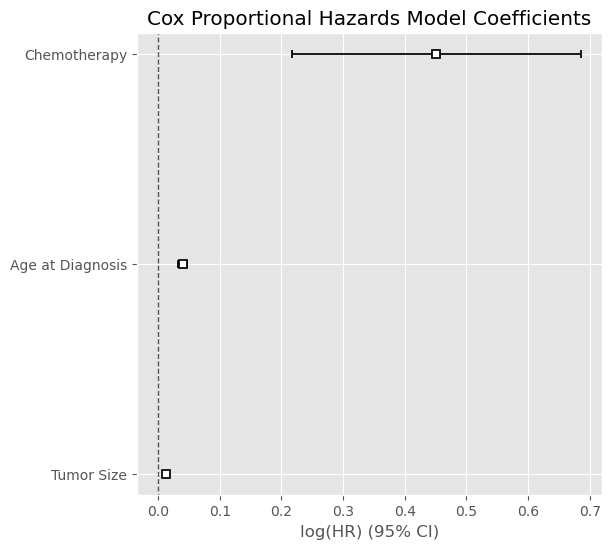

In [124]:
data = df_cleaned[["Overall Survival (Months)", "Overall Survival Status", "Age at Diagnosis", "Tumor Size", "Chemotherapy"]].copy()
data["Chemotherapy"] = data["Chemotherapy"].apply(lambda x: 1 if x == "Yes" else 0)

# Filter data for 10-year analysis (120 months)
data["Overall Survival (Months)"] = data["Overall Survival (Months)"].clip(upper=120)  # Censor times beyond 120 months

# Cox Proportional Hazard Model
cox_model = CoxPHFitter()  # Instantiate the model
cox_model.fit(data, duration_col="Overall Survival (Months)", event_col="Overall Survival Status")  # Fit the model

# Summary of the Cox model
print(cox_model.summary)  # View coefficients and statistical significance

# Visualize the model's coefficients
plt.figure(figsize=(6, 6))
cox_model.plot()
plt.title("Cox Proportional Hazards Model Coefficients")
plt.show()